In [8]:
import os
import glob
from pathlib import Path

import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib notebook
import mplcursors
from ipywidgets import widgets

In [9]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [10]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.columns)

Index(['player', 'aces', 'bk_pts', 'bp_saved', 'crosscourt', 'deep', 'dfs',
       'down_middle', 'down_the_line', 'err_deep', 'err_net', 'err_wide',
       'err_wide_deep', 'first_aces', 'first_forced', 'first_in', 'first_pts',
       'first_pts_won', 'first_unret', 'first_won', 'first_won_lte_3_shots',
       'forced_err', 'in_play', 'in_play_won', 'induced_forced', 'inside_in',
       'inside_out', 'net_pts', 'net_unforced', 'net_winner', 'passed_at_net',
       'passing_shot_induced_forced', 'pt_ending', 'pts', 'pts_won',
       'pts_won_lte_3_shots', 'return_forced', 'return_pts', 'return_pts_won',
       'returnable', 'returnable_won', 'second_aces', 'second_forced',
       'second_in', 'second_pts', 'second_pts_won', 'second_unret',
       'second_won', 'second_won_lte_3_shots', 'serve_pts', 'serve_return',
       'shallow', 'shots', 'shots_in_pts_lost', 'shots_in_pts_won', 'snv_pts',
       'total_shots', 'unforced', 'unforced_bh', 'unforced_fh', 'unret',
       'very_deep', 'w

In [16]:
# split data
X = df.loc[:, df.columns != 'player']
labels = df['player']

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

#cluster
dbscan = DBSCAN(eps=10000,min_samples=10)
clusterlabels = dbscan.fit_predict(X)
print(clusterlabels)
print(len(X.columns))

[ 0 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0  0 -1 -1  0 -1 -1  0
  0 -1 -1  1  0  0  0 -1 -1 -1 -1  0  1 -1 -1 -1  0 -1  0  0 -1 -1  0  0
 -1  0  0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0 -1  1 -1  1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [17]:
# #umap dimension reduction
# umap = umap.UMAP(n_components = 2)
# data = umap.fit_transform(X)

#pca dimension reduction
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(X)
data = pca.transform(X)
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.99558698 0.00289803]
[[ 7.86485474e-03  2.98517524e-03  1.79624495e-03  4.96985911e-02
   6.08793063e-02  2.71702642e-03  2.55328535e-02  1.42982599e-02
   1.56971224e-03  1.58202595e-03  9.06346819e-04  1.52896925e-04
   3.60777453e-03  6.85309831e-03  5.44983351e-02  3.26918517e-02
   2.29910379e-02  4.50214151e-04  1.53291256e-02  1.36063824e-02
   7.88639870e-03  9.92173127e-02  4.81452522e-02  2.46614006e-02
   2.99179461e-03  1.45643073e-02  1.61810852e-02  2.16672975e-03
   7.18930866e-03  2.84824672e-03  1.21519605e-03  8.30016473e-02
   1.81643067e-01  1.05178430e-01  1.72869838e-02  3.21210591e-03
   3.46364897e-02  1.28089055e-02  1.92641130e-01  4.81452522e-02
   1.18447429e-04  1.03146314e-03  1.28377228e-02  1.92537429e-02
   9.74535573e-03  3.35083175e-05  6.49845864e-03  3.67619199e-03
   3.46364897e-02  7.60309006e-02  2.17780555e-02  4.17633526e-01
   2.07252839e-01  2.10380688e-01  1.97611398e-02  7.79350309e-01
   5.18060588e-02  5.08754726e-03  5.56619231e-03  6

In [18]:
# search dashboard
text = widgets.Text()
display(text)

def handle_submit(sender):
    idx = labels[labels==text.value]
    point = None
    if(len(idx)>0):
        pointidx = idx.index[0]
        point = data[pointidx]
    print(text.value,": ",point)

text.on_submit(handle_submit)

Text(value='')

Serena_Williams :  [116583.84601673   8319.89284015]


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


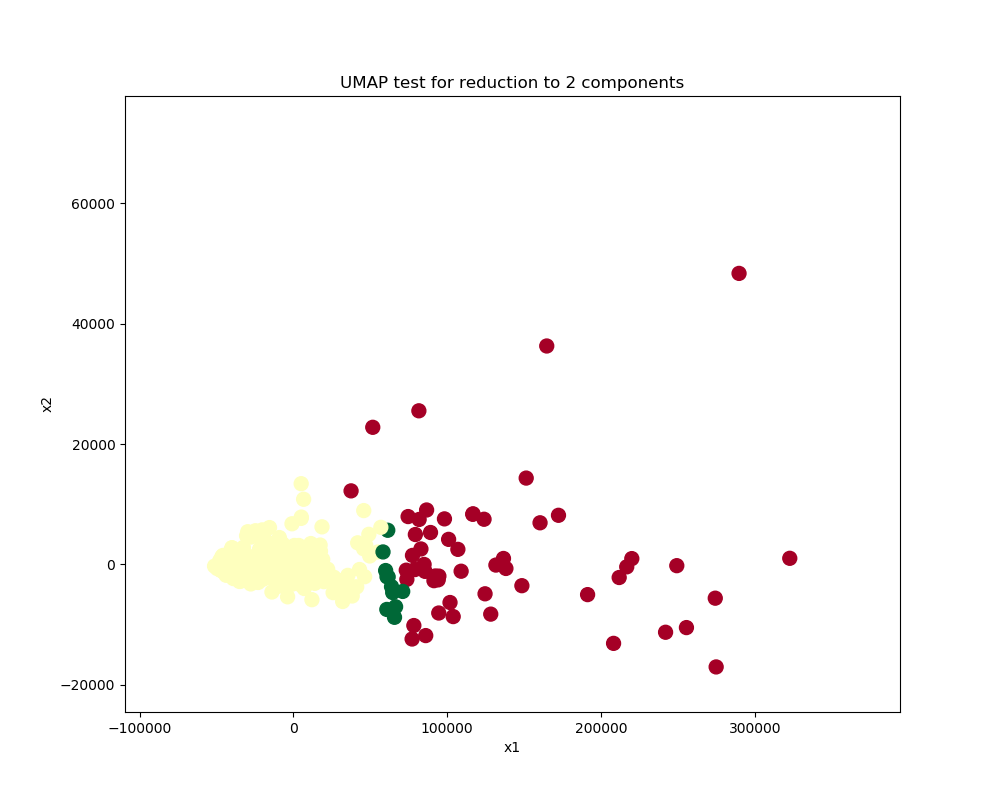

In [19]:
#plot data
x = data[:,0]
y = data[:,1]
names = labels.to_numpy()
param = 'winners'
c = clusterlabels #np.log(X[param].to_numpy()+0.001) #np.random.randint(1,5,size=len(x))
#c = X[param].to_numpy()
maximum = np.max(c)
minimum = np.min(c)
print(type(names),type(c))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([(names[n]+':'+(str)(c[n])) for n in ind["ind"]])) #, 
                           #" ".join([(str)(c[n]) for n in ind["ind"]]))
    
    
#     "{}:{}".format(" ".join([names[n] for n in ind["ind"]]),
#                        " ".join([c[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
fig.set_size_inches(10,8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('UMAP test for reduction to 2 components')
plt.show()
plt.clim(minimum, maximum)
#plt.colorbar(axp,cmap = c)


sources
<br>
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
<br>